### Assignment 4

**Developer:** Ryan Parks

**Course**: Artificial Intelligence Applications

**Semester:** Summer 2024

**Program requirements:**

1. Contrast similarities/differences among AI vs. Machine Learning vs. Deep Learning
2. Identify correlations
3. Use Seaborn (data visualization library built on top of matplotlib)
4. Graph correlations
5. Use simple linear regression
6. Create linear model
7. Plot regression line
8. Make predictions -  using simple linear regression model
9. Plot residuals

## Regression Analysis

### What is regression analysis?

1. Equation predicts "unknown values" based upon one or more known values
2. Dependent variables: response, outcome/output, or target variables
3. Independent variables: predicter, input, regressor, or explanatory variables
4. Goal: Find the best fitting line which can accurately predict the output

Dependent variables are always the one being studied -- that is, whose variation(s) is/are being modified somehow!

Independent variables are always the ones being manipulated to study and compare the effects of the dependent variables.

Note: Linear regression has 3 types:

1. Simple linear regression
2. Multiple linear regression
3. Multivariate linear regression

**Simple linear regression**: Only one independent variable affecting one dependent variable.

**Multiple linear regression**: Two or more independent variables affecting one dependent variable.

**Multivariate linear regression**: Two or more independent variables affecting two or more dependent variables.

### Independent Variables vs. Dependent Variables

Independent Variables:

- Can the variables be manipulated or controlled?
- Does the variable(s) come before the other variable(s) chronologically?
- Is/are the variables being used to see the affects on another variable?

Dependent Variables:

- Is/are the variable(s) being used as a measured outcome?
- Does the variable(s) depend upon another variable?
- Is/are this/these variable(s) measured after another variable is modified?

### Supervised vs Unsupervised Learning

- Supervised learning: prior knowledge of what output values for samples should be.
- Unsupervised learning: does not have labeled outputs. Goal is to infer natural structure present within a set of data points.

In [5]:
import numpy as np
import pandas as pd

## Get data - read cleaned csv file

In [7]:
advertising_data = pd.read_csv("my_company_data.csv")

advertising_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


##  Analyze dataset

In [9]:
advertising_data.shape

(200, 4)

In [10]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
advertising_data.describe()

pd.options.display.float_format = "{:,.2f}".format

print(advertising_data.describe())

          TV  Radio  Newspaper  Sales
count 200.00 200.00     200.00 200.00
mean  147.04  23.26      30.55  15.13
std    85.85  14.85      21.78   5.28
min     0.70   0.00       0.30   1.60
25%    74.38   9.97      12.75  11.00
50%   149.75  22.90      25.75  16.00
75%   218.82  36.52      45.10  19.05
max   296.40  49.60     114.00  27.00


In [12]:
advertising_data.corr().head()

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

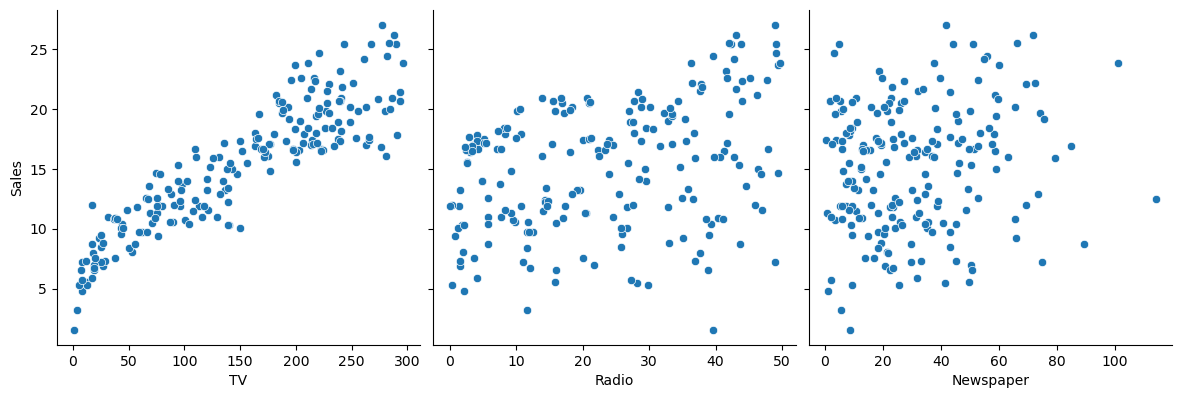

In [14]:
sns.pairplot(advertising_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [15]:
advertising_data.corr()[['Sales']].sort_values(by='Sales', ascending=False)

,Sales
Sales,1.00
TV,0.90
Radio,0.35
Newspaper,0.16


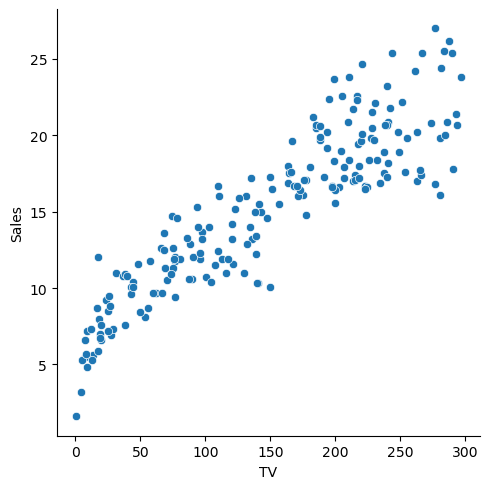

In [16]:
sns.relplot(data=advertising_data, x='TV', y='Sales')

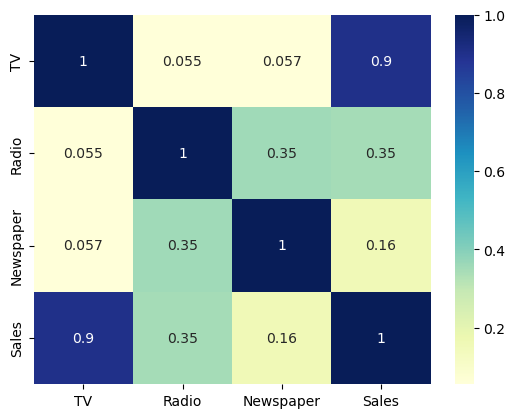

In [17]:
sns.heatmap(advertising_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

<Axes: >

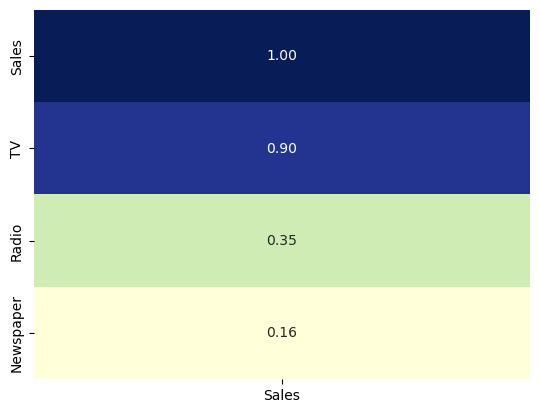

In [18]:
sns.heatmap(data=advertising_data.corr()[['Sales']].sort_values(by='Sales', ascending=False), annot=True, cmap="YlGnBu", cbar=False, fmt=f'.2f')

## Simple Linear Regression Steps

1. Identify x (IV) and y (DV):x=TV, y=Sales
2. Create Train and Test datasets
3. Train model
4. Evaluate model

In [20]:
x = advertising_data['TV']
y= advertising_data['Sales']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Review train datasets after splitting

In [23]:
x_train

74    213.40
3     151.50
185   205.00
26    142.90
90    134.30
       ...  
87    110.70
103   187.90
67    139.30
24     62.30
8       8.60
Name: TV, Length: 140, dtype: float64

In [24]:
y_train

74    17.00
3     16.50
185   22.60
26    15.00
90    14.00
       ... 
87    16.00
103   19.70
67    13.40
24     9.70
8      4.80
Name: Sales, Length: 140, dtype: float64

**Add column to perform regression fit properly for simple linear regression:**

In [26]:
print(x_train.shape)
print(x_test.shape)

(140,)
(60,)


## Prepare Model

In [28]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

print(x_train.shape)
print(x_test.shape)

(140, 1)
(60, 1)


## Fitting model: Find best fitting line -- to accurately predict output

In [30]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)

## Intercept and Slope - Why?

In [32]:
print("Intercept :",lm.intercept_)

print('Slope :',lm.coef_)

Intercept : 6.9486832000013585
Slope : [0.05454575]


### r2 values - how well regression line approximates actual data

- R2 also known as Coefficient and Determination
- R2 determines how good a linear fit exists between predictors and target variable
- Returns values between 0 and 1 inclusively -- higher the value, better the model

In [34]:
y_train_predict = lm.predict(x_train)
y_test_predict = lm.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_train,y_train_predict))
print(r2_score(y_test,y_test_predict))

0.8157933136480388
0.792103160124566


## Plot linear regression (using simple estimation)

<Axes: xlabel='TV', ylabel='Sales'>

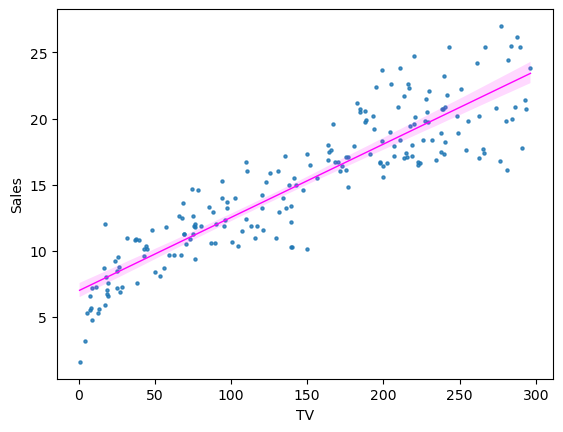

In [36]:
sns.regplot(data=advertising_data, x='TV', y='Sales', ci=95, scatter_kws={'s':5}, line_kws={"lw":1, 'color':'magenta'})

## Plot residuals using Seaborn

<Axes: xlabel='TV', ylabel='Sales'>

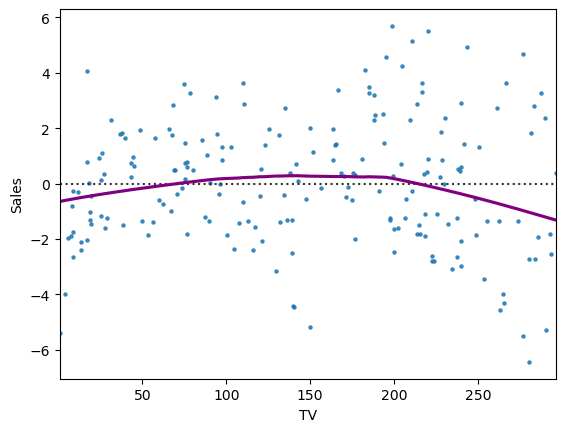

In [38]:
sns.residplot(data=advertising_data, x='TV', y='Sales', scatter_kws={'s':5}, lowess=True, line_kws={'color':'purple'})